In [200]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import edhec_risk_kit as erk
import yfinance as yf
import seaborn as sns
from datetime import date
from pandas_datareader import data
import work as work
import investpy

import plotly.express as px
import plotly.graph_objects as go
import plotly

import ipywidgets as widgets
from ipywidgets import interact, interact_manual


%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = work.updated_world_indices(category = 'Major', timeframe='Weekly')
hmap = data[0]
rawdata = data[1]

[*********************100%***********************]  39 of 39 completed


# Weekly Global Market Report

**Date:** 18th July, 2020

## World Equities

### Local Currency & USD Performance (Weekly & YTD)
*Data is sorted by Weekly USD Performance (%)

In [39]:
def hmap(sortby):
    hmap = rawdata.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Price (EOD)': "{:.2f}",'Chg': "{:.2f}", 'Chg (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}", '$ Chg (%)': "{:.2%}", '$ Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(hmap.drop(['Price (EOD)', 'Chg', 'Country'], axis=1).columns))
    return hmap
    
style = {'description_width': 'initial'}
interact(hmap,
             sortby = widgets.Dropdown(options=(('Weekly LCL Returns', 'Chg (%)'), ('YTD LCL Returns', 'Chg YTD (%)'),
                                                ('Weekly USD Returns', '$ Chg (%)'), ('YTD USD Returns', '$ Chg YTD (%)')),
                                                value = '$ Chg (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', index=2, options=(('Weekly LCL Returns', 'Chg (%)'), (…

In [140]:
def perf(timeframe):
    weekly_usd = rawdata
    if timeframe=='Weekly USD':
        weekly_usd = ((pd.DataFrame(weekly_usd['$ Chg (%)']*100)).dropna().sort_values(by='$ Chg (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=rawdata['Country'])
        
    elif timeframe=='YTD USD':
        weekly_usd1 = rawdata.sort_values(by='$ Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['$ Chg YTD (%)']*100)).dropna().sort_values(by='$ Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Country'])
    

    fig.update_layout(title = 'World Indices ' + str(timeframe) + ' Performance (%) in US Dollar Terms (EOD)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%')
    fig.update_traces(hovertemplate='Index: %{x} <br>Country: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf,
             timeframe = widgets.Dropdown(options=('Weekly USD','YTD USD'),
                                                value = 'Weekly USD', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly USD', 'YTD USD'), style=Description…

**HIGHLIGHTS:**

- US stocks broadly gained this week despite fragile sentiment as the US earnings season kicked off. Big US banks reported mixed second quarter earnings as well as large reserve in anticipation of loan losses. Week-to-date, the Dow Jones gained 2.5%, the S&P500 rose 1.0% and NASDAQ fell 1.4%. 


- Moderna’s claim of promising vaccines trial as well as Apple’s key tax victory in European court helped fuel the gains. While Covid-19 cases are surging in the US, a major risk to the ongoing economic recovery, the general view is that the US would not re-enter strict lockdown. 


- Globally, central banks’ macro assessment turned more positive but continued to highlight uncertain outlook surrounding the fluid situation of the pandemic. The BOJ, ECB and BOC all left their key rates unchanged. US data were encouraging this week, supporting the narrative of a gradual recovery.Highlights this week include the 7.5% MOM gain in US retail sales and 5.4% increase in industrial production, alongside stabilising jobless claims data. 


- Sentiments were also upbeat among small business owners as well as homebuilders. Elsewhere, the Eurozone’s May international trade remained more than 20% lower compared to the same period last year. Eurozone and UK both saw rebound in industrial production. UK unemployment rate was steady at 3.9%, while the economy lost 125k jobs, offering mixed assessment of the labour market. CPI posted a surprise 0.1% MOM increase.


- In Asia, China 2Q GDP growth came in better than expected at 3.2% YOY while its key economic indicators (retail sales, IPI and fixed investment) also point to gradual recovery. Japan industrial production on the other hand fell for the eighth consecutive month.


- Singapore plunged into technical recession with a 41.2% QOQ contraction. YOY, the economy contracted 12.6%. Downunder, Australia reported more than 200k job gains, only in the part-time segments. New Zealand CPI fell for the first time in more than 4 years and its Manufacturing PMI surged back above 50.

- Most key data are out on Monday morning when a new trading week begins. China’s PBOC is expected to keep its 1-year loan prime rate steady at 3.85% as the economy stabilises. Japan’s trade data are New Zealand’s services PMI are both scheduled for a pre-8am releases.


- Moving on to Tuesday, the main focus is on RBA’s meeting minutes. Other than that, Japan’s CPI inflation and New Zealand’s card spending will also be out in the morning. Hong Kong CPI will come later of the day. US data is limited to the Chicago Fed National Activity Index.


- Wednesday turns busy given the release of Malaysia CPI on the home front. Expectations are for a 4th straight month of negative print at 1.3% YOY for June. Japan’s preliminary Markit services and manufacturing PMIs are expected to offer us first hand insights into its current economic condition. 


- Australia’s preliminary retail sales and Westpac leading index could be key drivers for the Aussie dollar. Housing data namely existing home sales and the FHFA House Price Index and mortgage applications are in the US calendar. Singapore CPI, Australia NAB Business Confidence and Eurozone flash Consumer Confidence Index are slated for a Thursday release. These are then followed by US jobless claims numbers, leading index and Kansas City Fed Manufacturing.


- Friday’s calendar is packed with flash PMI readings for US, Eurozone and UK. Other than that, US new home sales, UK consumer confidence and retail sales, New Zealand trade data and Singapore IPI are Friday’s highlights. 

## Fixed Income

In [205]:
#nbi:hide_in
#from IPython.display import IFrame
#IFrame('https://www.koyfin.com/corp', width=1200, height=600)

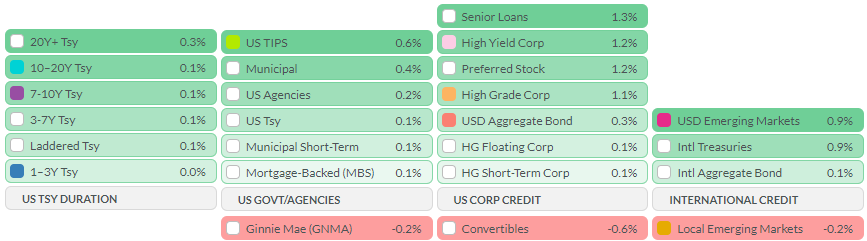

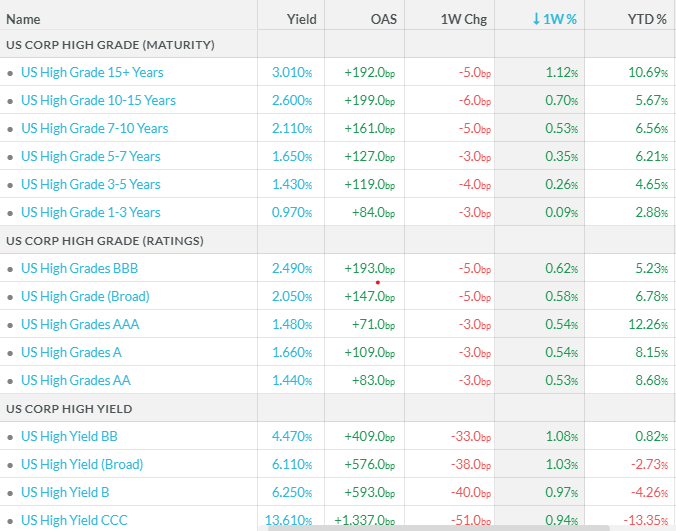

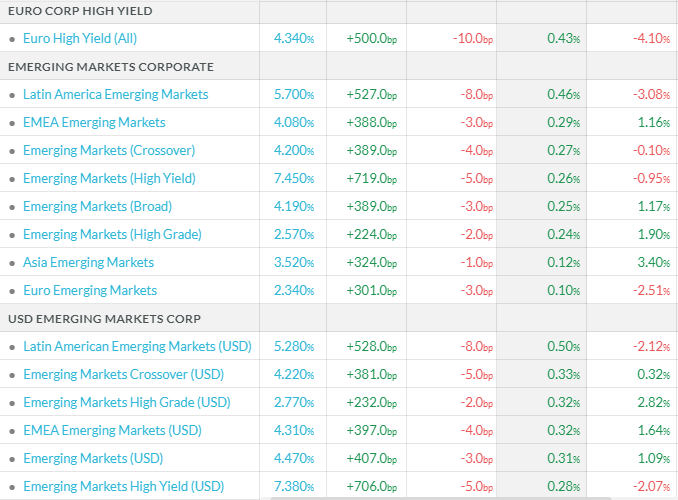

- The week under review saw US Treasuries saw relatively quiet and listless sessions as ongoing worries over the resurgence of COVID-19 infections temepered with slightly better US economic data. Overall yields were the least volatile seen in months with overall benchmark yields within 1bps of prior week’s close.


- The 2Y benchmark; reflective of interest rate predictions ended within 1bps lower at 0.15% whilst the much-watched 10Y (which traded within a tighter 0.61%-0.68% range); edged half basis point higher at 0.62%. Meanwhile foreign holdings of UST’s rose by ~81b USD to a 3-month high of 6.86 trillion USD in May as the market found safe-haven support due to the economic malaise. Both Japan and China still hold the reins at 1.26 trillion USD and 1.08 trillion USD respectively.


- The first half of the year was characterised by overwhelming uncertainty, and this looks set to continue into the second half. The economic impact of a spike in virus cases in the US is proving tricky to assess: while cases are up, mortalities are low, which could mean less pressure on policymakers to take drastic lockdown measures. 


- Moreover, higher case counts do not yet appear to be leading to reduced mobility and activity, so it may be that the virus persists but the economic impact is relatively mild, though the data could change quickly. The political backdrop is also uncertain: US-China tensions could well flare up and, with the US election looming, the Trump administration’s approach is difficult to predict. As with US-China trade rhetoric in 2019, true insight into the path of this relationship is hard to come by.


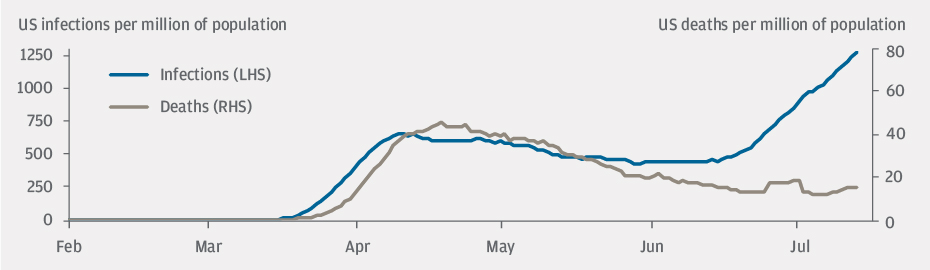

Source: Bloomberg, Johns Hopkins University; data as of 13 July 2020. Infections and deaths are shown on a one-week rolling basis


- One thing is certain: asset prices have been boosted by monetary policy, with core rates firmly anchored, especially at the front end of the curve. The retracement in spread sectors (79% in investment grade, 73%in high yield and 60% in emerging markets, as of 15 July) has been dramatic. The easy money has thus already been made, and as we move deeper into the summer months, investors will be looking to position their portfolios in areas where pockets of value still exist. 


- In investment grade credit – an asset class supported by strong demand – one area of interest is 7-10 year US corporates. This part of the market offers improved carry and roll compared to shorter maturities, given that the Federal Reserve has kept curves relatively steep, only buying bonds of up to five years maturity in the Secondary Market Corporate Credit Facility. In high yield, the higher coupons on offer in the primary market have looked relatively attractive, especially from issuers with sufficient liquidity to see through this crisis and those borrowing on a secured basis.


- Typically, the summer period brings lower issuance and lighter liquidity as markets enter a lull in late July and August. In the past, this seasonal pattern has led to outperformance of core rates and underperformance of spread sectors. However, the trend has not played out consistently, and 2020 is not a typical year. Government issuance is expected to remain high given the scale of fiscal funding needed in the wake of Covid, with the progress of policies such as the EU recovery fund key to watch. 


- In addition, the weight of cash in money market funds remains high, and investors will still be on the lookout for positive-yielding assets. Flows into most fixed income asset classes are now positive year to date, and could simply continue, leading to an environment in which spreads grind even tighter over the summer.

## Currencies (FX)

In [281]:
ccy = pd.read_excel('World_Indices_List.xlsx', sheet_name='Currencies', header=0)
ccy_data = yf.download(list(ccy['Ticker']), start='2020-01-01', progress=False)
ccy_data = ccy_data['Close'].ffill()

In [282]:
def ccy_perf():
    oned_lcl = pd.concat([(ccy_data.iloc[-1,:]/ccy_data.iloc[-6,:]-1),
                            (ccy_data.iloc[-1,:]/ccy_data.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Ticker'
    oned_lcl = ccy.merge(oned_lcl, on='Ticker')
    oned_lcl= oned_lcl.set_index('Ticker')
    return oned_lcl

ccy = ccy_perf()

In [283]:
def ccy_hmap(sortby):   
    hmap = ccy.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.3%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn', subset=list(ccy.drop(['Name'], axis=1).columns))
    return hmap
    
interact(ccy_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [285]:
def perf_ccy(timeframe):
    weekly_usd = ccy
    if timeframe=='Weekly':
        weekly_usd1 = ccy.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).sort_values(by='Chg WTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    elif timeframe=='YTD':
        weekly_usd1 = ccy.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).sort_values(by='Chg YTD (%)', ascending=False))
        fig = px.bar(weekly_usd, color=weekly_usd.values, text=weekly_usd1['Name'])

    fig.update_layout(title = 'World Currencies ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Indices',
                       yaxis_title='Return (%)', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%')
    fig.update_traces(hovertemplate='Ticker: %{x} <br>Name: %{text} <br>Return: %{y:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_ccy,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**

- US Dollar continued its down trend but has regained some strength post U.S. jobs data which casted doubt on the path of economic recovery. U.S. major banks’ results painted an uncertain future, providing more provisions for loan-loss. 


- EURUSD rose to gain 0.9% week-on-week, having retraced from the peak post ECB’s meeting which left main policy rates unchanged. Economists were predicting an additional 500 billion Euros stimulus by end of the year to shore up the economy in view of uneven recovery in Euro zone with Germany fared better versus Italy. GBPUSD continued to be haunted by Brexit as well as weakening employment and inflation outlook; the pair weakened by 0.36% WoW.


- Asian currencies were slightly weaker with exception of IDR and THB, weakening by 0.4% and 1.39% respectively. Indonesia cut interest rates by 25bps again on Thursday; investors raised concerns on exit strategy of USD39.7 billion burden-sharing scheme between Bank Indonesia and government. On the other hand, resignation of Deputy Prime Minister and several key officials in Thailand triggered fear of continuity of government’s economic policies. 


- **USD:** The dollar saw mixed performances this week. Scandinavian currencies and the EUR scored largest gains. CAD, JPY, AUD were little changed on a weekly basis while GBP, NZD and CHF weakened the most among the majors. The greenback were generally weak this week but staged a comeback on Thursday.


- Compared to last week, DXY was 0.73% lower at 95.94, extending its losing streak to the fourth week. US Covid-19 cases continued to climb but the general view is that state authorities would not reimpose strict lockdown rules, hence no major risk to ongoing recovery. Having said that, there is still risk for DXY to sustain the break below 96 despite the recent gain, as markets are ever so prone to short-term shifts in risk sentiment.


- **EUR**: The euro strengthened this week by 0.92%, hitting 1.14 in the process. USD’s resurgence pulled the pair back to the topside of 1.13. Pair is trading at 1.1431 as of writing. ECB offers very little surprise, maintaining its key rates, bond buying programs as well as policy stance. Momentum has not fully dissipated and there is chance that EUR would sustain Friday's move higher above the 1.14 level next week as well as USD strength could only be temporary.


- **GBP**: The pound slipped 0.36% this week, partially reversing last week’s gains. Investors cast doubt over the UK’s economic fundamentals, which explains that last week’s rally was only a brief one. Despite steady unemployment rate, concerns over broader economic outlook alongside the lack of progress in Brexit seem to be acting against GBP. Pair is trading at 1.2567 at the moment and in the week ahead.


- **JPY**: The yen was virtually unchanged (-0.04%) against the greenback this week. USD/JPY continues to trade slightly above 107, closing below the level only once in mid-week. The BOJ left its ultraloose monetary policy unchanged, revised down its forecast but maintain the same dovish stance. We can expect the pair to stay neutral, comfortably within 106-108. Any diversion from the range is still unlikely in the short term.


- **AUD**: The Aussie dollar gained a mere 0.27% against the USD. AUD/USD managed to break past and close above 0.70 briefly before being sent down to 0.6995. Despite better than expected China’s GDP, Australia’s job data were a mixed bag and the ongoing lockdown in Melbourne also poses as a key risk to AUD outlook. 


- We can continue to see 0.70 as a major resistance. There are still chances of a consolidation may continue given that the pair remains above its moving averages, some return to 0.67 levels is possible if there is a huge retreat in risk sentiment.


- **SGD**: SGD was almost unchanged against the USD this week, remaining at the bottom of 1.39, unfazed by China’s GDP and Singapore GDP’s more than 40% contraction. The pair's upward momentum still looks limited for now, with the psychological 1.4000 big figure resistance holding up.

## Commodities

In [286]:
comds= pd.read_excel('World_Indices_List.xlsx', sheet_name='Commodities', header=0)

In [287]:
tdy = str(date.today().day)+'/'+str(date.today().month)+'/'+str(date.today().year)

def comd_data(commodity):
    df = investpy.get_commodity_historical_data(commodity=commodity, from_date='01/01/2020', to_date=tdy)['Close']
    df = pd.DataFrame(df)
    df.columns = [commodity]
    return df

df = pd.DataFrame(index=pd.bdate_range(start='2020-01-01', end=date.today()))
df.index.name='Date'

for i in range(len(comds)):
    df = df.join(comd_data(comds['Commodities'][i]), on='Date')

df = df.ffill().dropna()

In [288]:
def comd_perf():
    oned_lcl = pd.concat([(df.iloc[-1,:]/df.iloc[-6,:]-1),
                            (df.iloc[-1,:]/df.iloc[0,:]-1)], axis=1)
    oned_lcl.columns = ['Chg WTD (%)', 'Chg YTD (%)']
    oned_lcl.index.name = 'Commodities'
    return oned_lcl

comd = comd_perf()

In [289]:
def comd_hmap(sortby):   
    hmap = comd.sort_values(by=sortby, ascending=False)
    hmap = hmap.style.format({'Chg WTD (%)': "{:.2%}", 'Chg YTD (%)': "{:.2%}"})\
                         .background_gradient(cmap='RdYlGn')
    return hmap
    
interact(comd_hmap,
             sortby = widgets.Dropdown(options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (%)')),
                                                value = 'Chg WTD (%)', style=style, description='Sort By: '));

interactive(children=(Dropdown(description='Sort By: ', options=(('Weekly', 'Chg WTD (%)'), ('YTD', 'Chg YTD (…

In [290]:
def perf_comd(timeframe):
    weekly_usd = comd
    if timeframe=='Weekly':
        weekly_usd1 = comd.sort_values(by='Chg WTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd['Chg WTD (%)']*100)).dropna().sort_values(by='Chg WTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    elif timeframe=='YTD':
        weekly_usd1 = comd.sort_values(by='Chg YTD (%)', ascending=False)
        weekly_usd = ((pd.DataFrame(weekly_usd1['Chg YTD (%)']*100)).dropna().sort_values(by='Chg YTD (%)', ascending=True))
        fig = px.bar(weekly_usd, color=weekly_usd.values, orientation='h')

    fig.update_layout(title = 'Commodities ' + str(timeframe) + ' Performance (%)',
                       xaxis_title='Return (%)',
                       yaxis_title='Commodities', font=dict(family="Segoe UI, monospace", size=13, color="#7f7f7f"),
                       legend_title_text='Return(%)', plot_bgcolor = 'White', yaxis_tickformat = '{:.2f}%')
    fig.update_traces(hovertemplate='Commodity: %{y} <br>Return: %{x:.2f}%') 
    fig.update_yaxes(automargin=True)
    fig.show()
    
interact(perf_comd,
             timeframe = widgets.Dropdown(options=('Weekly','YTD'),
                                                value = 'Weekly', style=style, description='Timeframe: '));

interactive(children=(Dropdown(description='Timeframe: ', options=('Weekly', 'YTD'), style=DescriptionStyle(de…

**HIGHLIGHTS:**


- 

### CHARTS OF THE WEEK

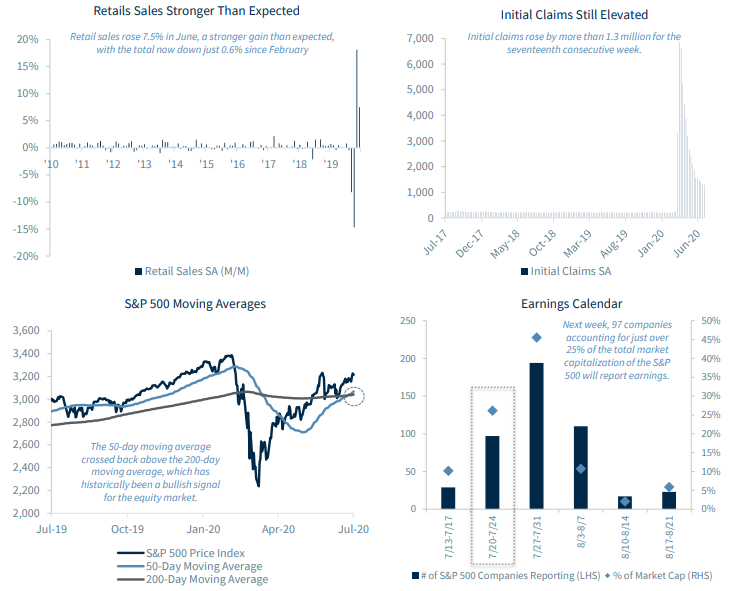

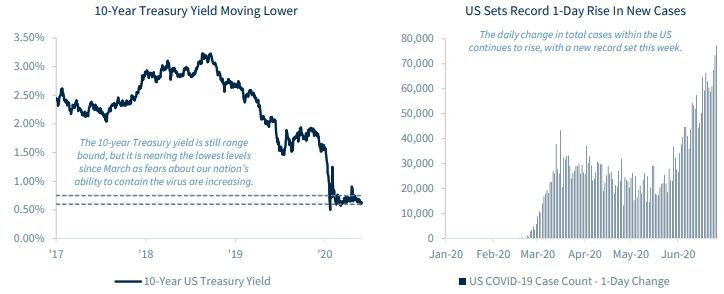

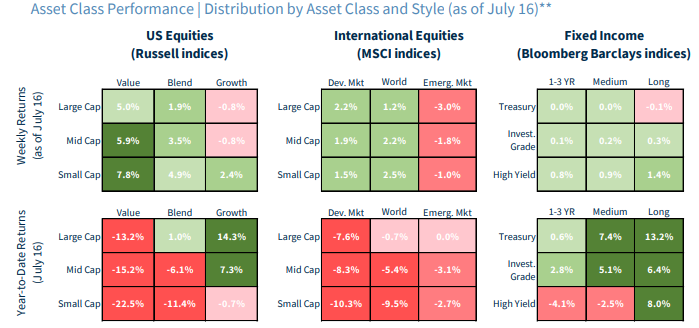

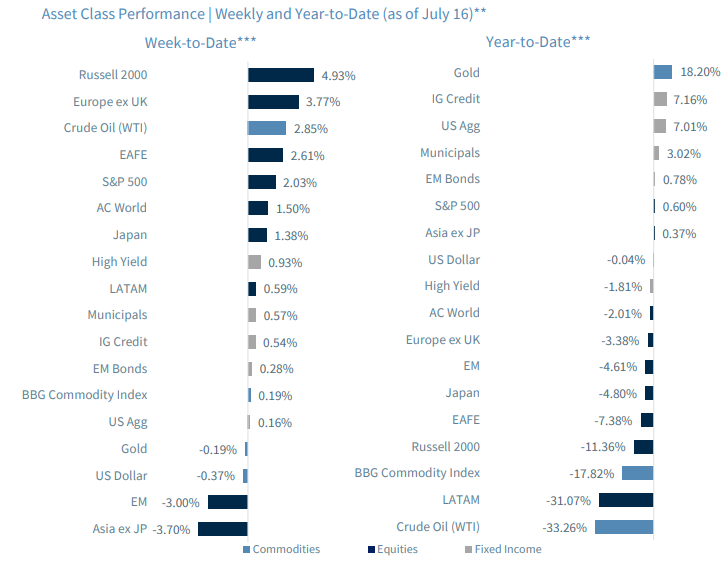